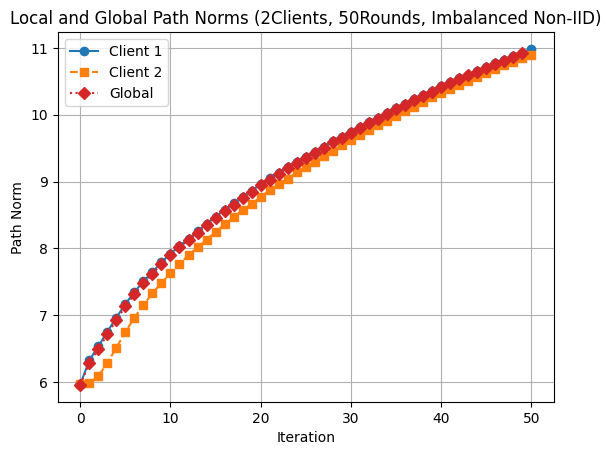

In [2]:
import json
import matplotlib.pyplot as plt

# 定义文件路径
file_paths = [
    "/Users/max/Fedn_Project/MNIST/2clients_50rounds_imbanlanced(1001)_Non_IID(Alpha=001)/metadata_1_0.01.json",
    "/Users/max/Fedn_Project/MNIST/2clients_50rounds_imbanlanced(1001)_Non_IID(Alpha=001)/metadata_2_0.01.json",
]

# 初始化列表存储每个客户端的 local_path_norm 和 global_path_norm
all_local_path_norms = []
global_path_norms = []

# 从文件中读取 local_path_norm 和 global_path_norm 值
for idx, file_path in enumerate(file_paths):
    with open(file_path, 'r') as file:
        data = json.load(file)
        # 提取 local_path_norm 值
        local_path_norms = [entry['local_path_norm'] for entry in data]
        # 在第一位加入指定的值
        local_path_norms.insert(0, 5.965043080215098)
        all_local_path_norms.append(local_path_norms)
        # 只需要从一个文件中提取 global_path_norm（假设每个文件中的 global_path_norm 相同）
        if idx == 0:
            global_path_norms = [entry['global_path_norm'] for entry in data]

# 使用更加美观的颜色和标记
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # 使用 matplotlib 默认的颜色循环
linestyles = ['-', '--', '-.']
markers = ['o', 's', '^']

# 绘制每个客户端的 local_path_norm 曲线
for i, local_path_norms in enumerate(all_local_path_norms):
    iterations = range(len(local_path_norms))
    plt.plot(iterations, local_path_norms, linestyle=linestyles[i], marker=markers[i], color=colors[i], label=f'Client {i+1}')

# 绘制 global_path_norm 曲线
iterations = range(len(global_path_norms))
plt.plot(iterations, global_path_norms, linestyle=':', marker='D', color='#d62728', label='Global')

# 添加标题和标签
plt.xlabel('Iteration')
plt.ylabel('Path Norm')
plt.title('Local and Global Path Norms (2Clients, 50Rounds, Imbalanced Non-IID)')
plt.legend()
plt.grid(True)
plt.show()

Label: 0, Count: 5923, Percentage: 16.64%
Label: 3, Count: 6131, Percentage: 17.22%
Label: 5, Count: 5421, Percentage: 15.23%
Label: 6, Count: 5917, Percentage: 16.62%
Label: 7, Count: 6264, Percentage: 17.59%
Label: 9, Count: 5949, Percentage: 16.71%


/var/folders/hr/2t7hsj753qg3n1q7zbnr625m0000gn/T/ipykernel_71919/548814943.py:33: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load('/Users/max/Fedn_Project/MN

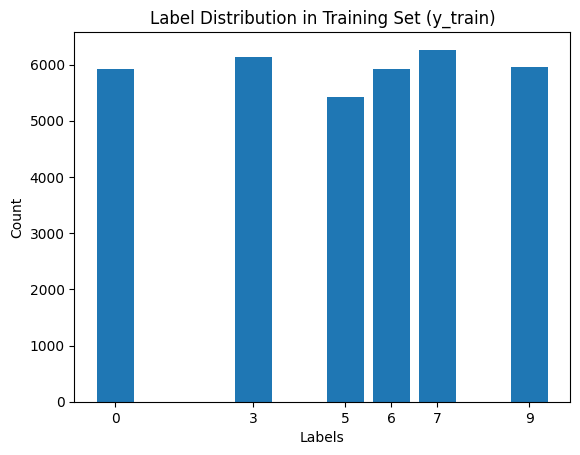

In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt

def plot_label_distribution(labels, title='Label Distribution'):
    """
    统计并可视化标签的数量及占比。

    参数：
    labels (torch.Tensor 或 np.array): 标签数据。
    title (str): 可视化图表的标题。
    """
    # 将标签转换为 NumPy 数组
    labels_np = labels.numpy() if isinstance(labels, torch.Tensor) else np.array(labels)

    # 使用 NumPy 统计每个标签的数量
    unique_labels, counts = np.unique(labels_np, return_counts=True)

    # 打印每个标签的数量及其占比
    total_count = len(labels_np)
    for label, count in zip(unique_labels, counts):
        percentage = (count / total_count) * 100
        print(f"Label: {label}, Count: {count}, Percentage: {percentage:.2f}%")

    # 可视化标签的数量
    plt.bar(unique_labels, counts)
    plt.xlabel('Labels')
    plt.ylabel('Count')
    plt.title(title)
    plt.xticks(unique_labels)
    plt.show()

data = torch.load('/Users/max/Fedn_Project/MNIST/2clients_50rounds_imbanlanced(1001)_Non_IID(Alpha=001)/clients_data/mnist1.pt')
y_train = data['y_train']
plot_label_distribution(y_train, title='Label Distribution in Training Set (y_train)')

Label: 1, Count: 692, Percentage: 28.37%
Label: 2, Count: 571, Percentage: 23.41%
Label: 4, Count: 600, Percentage: 24.60%
Label: 8, Count: 576, Percentage: 23.62%


/var/folders/hr/2t7hsj753qg3n1q7zbnr625m0000gn/T/ipykernel_71919/723684247.py:33: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load('/Users/max/Fedn_Project/MN

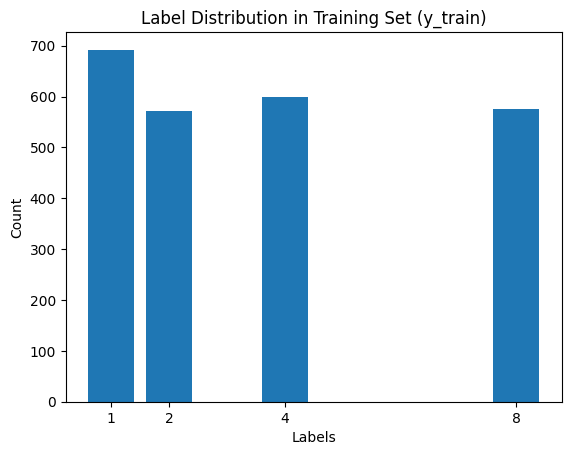

In [4]:
import torch
import numpy as np
import matplotlib.pyplot as plt

def plot_label_distribution(labels, title='Label Distribution'):
    """
    统计并可视化标签的数量及占比。

    参数：
    labels (torch.Tensor 或 np.array): 标签数据。
    title (str): 可视化图表的标题。
    """
    # 将标签转换为 NumPy 数组
    labels_np = labels.numpy() if isinstance(labels, torch.Tensor) else np.array(labels)

    # 使用 NumPy 统计每个标签的数量
    unique_labels, counts = np.unique(labels_np, return_counts=True)

    # 打印每个标签的数量及其占比
    total_count = len(labels_np)
    for label, count in zip(unique_labels, counts):
        percentage = (count / total_count) * 100
        print(f"Label: {label}, Count: {count}, Percentage: {percentage:.2f}%")

    # 可视化标签的数量
    plt.bar(unique_labels, counts)
    plt.xlabel('Labels')
    plt.ylabel('Count')
    plt.title(title)
    plt.xticks(unique_labels)
    plt.show()

data = torch.load('/Users/max/Fedn_Project/MNIST/2clients_50rounds_imbanlanced(1001)_Non_IID(Alpha=001)/clients_data/mnist2.pt')
y_train = data['y_train']
plot_label_distribution(y_train, title='Label Distribution in Training Set (y_train)')

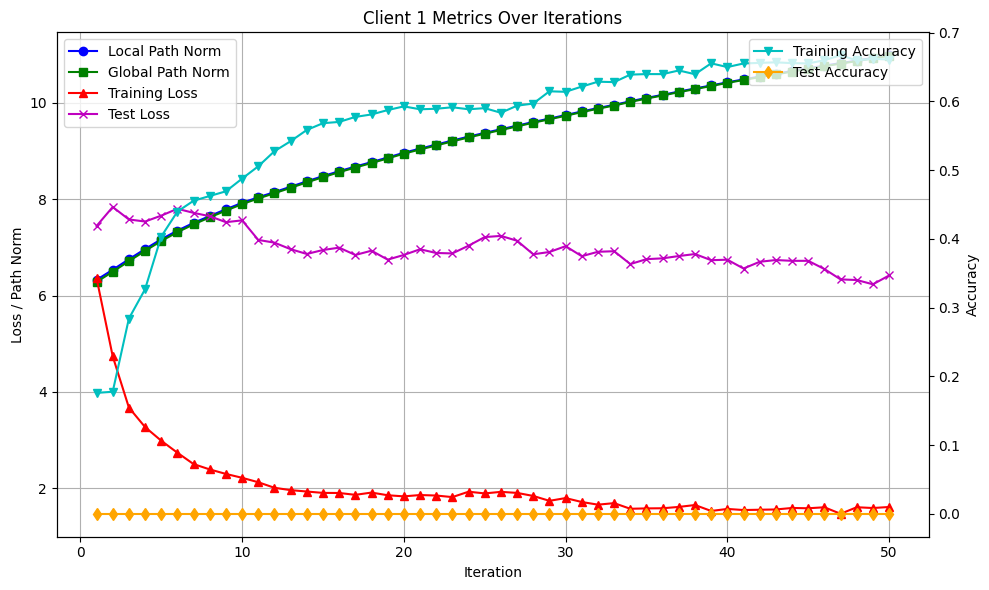

In [5]:
import json
import matplotlib.pyplot as plt

# 定义客户端1的文件路径
file_paths = [
    "/Users/max/Fedn_Project/MNIST/2clients_50rounds_imbanlanced(1001)_Non_IID(Alpha=001)/metadata_1_0.01.json",
    "/Users/max/Fedn_Project/MNIST/2clients_50rounds_imbanlanced(1001)_Non_IID(Alpha=001)/report_1_0.01.json"
]

# 从客户端1的report文件读取数据
client1_local_path_norm = []
client1_global_path_norm = []
client1_training_loss = []
client1_training_accuracy = []
client1_test_loss = []
client1_test_accuracy = []

with open(file_paths[1], 'r') as file:
    data = json.load(file)
    client1_global_path_norm = [entry['global_path_norm'] for entry in data]
    client1_training_loss = [entry['training_loss'] for entry in data]
    client1_training_accuracy = [entry['training_accuracy'] for entry in data]
    client1_test_loss = [entry['test_loss'] for entry in data]
    client1_test_accuracy = [entry['test_accuracy'] for entry in data]

# 从文件中读取客户端1的 local_path_norm 数据
with open(file_paths[0], 'r') as file:
    data = json.load(file)
    client1_local_path_norm = [entry['local_path_norm'] for entry in data]

# 创建图形和双Y轴
fig, ax1 = plt.subplots(figsize=(10, 6))
iterations = range(1, len(client1_local_path_norm) + 1)

# 左边Y轴的数据
ax1.plot(iterations, client1_local_path_norm, marker='o', linestyle='-', label='Local Path Norm', color='b')
ax1.plot(iterations, client1_global_path_norm, marker='s', linestyle='-', label='Global Path Norm', color='g')
ax1.plot(iterations, client1_training_loss, marker='^', linestyle='-', label='Training Loss', color='r')
ax1.plot(iterations, client1_test_loss, marker='x', linestyle='-', label='Test Loss', color='m')

ax1.set_xlabel('Iteration')
ax1.set_ylabel('Loss / Path Norm')
ax1.set_title('Client 1 Metrics Over Iterations')
ax1.grid(True)
ax1.legend(loc='upper left')

# 右边Y轴的数据
ax2 = ax1.twinx()
ax2.plot(iterations, client1_training_accuracy, marker='v', linestyle='-', label='Training Accuracy', color='c')
ax2.plot(iterations, client1_test_accuracy, marker='d', linestyle='-', label='Test Accuracy', color='orange')

ax2.set_ylabel('Accuracy')
ax2.legend(loc='upper right')

# 显示图形
plt.tight_layout()
plt.show()

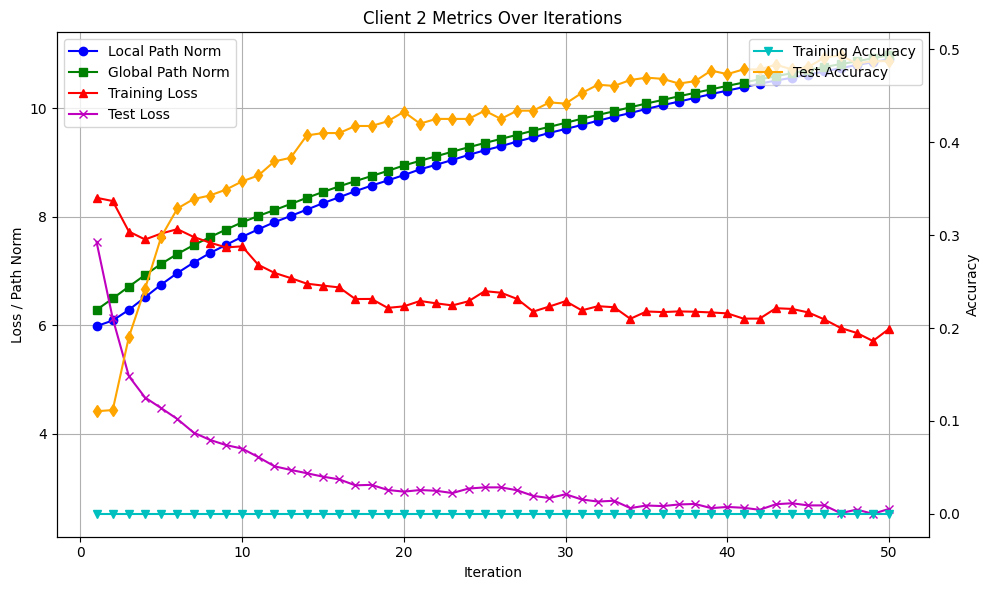

In [6]:
import json
import matplotlib.pyplot as plt

# 定义客户端2的文件路径
file_paths = [
    "/Users/max/Fedn_Project/MNIST/2clients_50rounds_imbanlanced(1001)_Non_IID(Alpha=001)/metadata_2_0.01.json",
    "/Users/max/Fedn_Project/MNIST/2clients_50rounds_imbanlanced(1001)_Non_IID(Alpha=001)/report_2_0.01.json"
]

# 从客户端2的report文件读取数据
client2_local_path_norm = []
client2_global_path_norm = []
client2_training_loss = []
client2_training_accuracy = []
client2_test_loss = []
client2_test_accuracy = []

with open(file_paths[1], 'r') as file:
    data = json.load(file)
    client2_global_path_norm = [entry['global_path_norm'] for entry in data]
    client2_training_loss = [entry['training_loss'] for entry in data]
    client2_training_accuracy = [entry['training_accuracy'] for entry in data]
    client2_test_loss = [entry['test_loss'] for entry in data]
    client2_test_accuracy = [entry['test_accuracy'] for entry in data]

# 从文件中读取客户端2的 local_path_norm 数据
with open(file_paths[0], 'r') as file:
    data = json.load(file)
    client2_local_path_norm = [entry['local_path_norm'] for entry in data]

# 创建图形和双Y轴
fig, ax1 = plt.subplots(figsize=(10, 6))
iterations = range(1, len(client2_local_path_norm) + 1)

# 左边Y轴的数据
ax1.plot(iterations, client2_local_path_norm, marker='o', linestyle='-', label='Local Path Norm', color='b')
ax1.plot(iterations, client2_global_path_norm, marker='s', linestyle='-', label='Global Path Norm', color='g')
ax1.plot(iterations, client2_training_loss, marker='^', linestyle='-', label='Training Loss', color='r')
ax1.plot(iterations, client2_test_loss, marker='x', linestyle='-', label='Test Loss', color='m')

ax1.set_xlabel('Iteration')
ax1.set_ylabel('Loss / Path Norm')
ax1.set_title('Client 2 Metrics Over Iterations')
ax1.grid(True)
ax1.legend(loc='upper left')

# 右边Y轴的数据
ax2 = ax1.twinx()
ax2.plot(iterations, client2_training_accuracy, marker='v', linestyle='-', label='Training Accuracy', color='c')
ax2.plot(iterations, client2_test_accuracy, marker='d', linestyle='-', label='Test Accuracy', color='orange')

ax2.set_ylabel('Accuracy')
ax2.legend(loc='upper right')

# 显示图形
plt.tight_layout()
plt.show()
